# House Prices DataSet

## Goals and objectives of the project  
Develop an accurate regression model to predict house prices based on the Ames Housing dataset, using effective preprocessing, feature engineering, and comparison of multiple algorithms.

### Functions

In [1]:
def diagnostic_plots(data, variable):

    """
        Displays three diagnostic plots (Histogram, Q-Q Plot, and Boxplot) side by side for a given variable.
    
        Parameters:
        - data: pd.DataFrame
            The dataset containing the variable.
        - variable: str
            The name of the variable to be visualized.
    
        The function creates:
        1. Histogram — to visualize the distribution of the variable.
        2. Q-Q Plot — to assess normality by comparing the quantiles to a normal distribution.
        3. Boxplot — to detect outliers and understand the spread of the variable.
    """

    # Set the figure size for all three plots
    plt.figure(figsize=(14, 4))
    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data[variable], bins=30) #111
    plt.title('Histogram')
    # Q-Q Plot
    plt.subplot(1, 3, 2)
    stats.probplot(data[variable], dist='norm', plot=plt) #111
    plt.ylabel('Variable quantiles')
    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data[variable]) #111
    plt.title('Boxplot')
    plt.tight_layout()
    plt.show()
    

def reg_plots(data, variable):
    """
        Displays a scatter plot with a regression line to visualize the linear relationship 
        between a given variable and the target variable 'SalePrice'.
    
        Parameters:
        - data: pd.DataFrame  
            The dataset containing the variables.
        - variable: str  
            The name of the explanatory (independent) variable.
    
        The plot shows:
        - Each data point as a scatter.
        - A red regression line indicating the linear trend.
        - Helps identify linear patterns, correlation, and outliers.
    """
    # Set figure size
    plt.figure(figsize=(8, 6))
    # Scatter plot with regression line
    sns.regplot(
        x=data[variable], 
        y=data['SalePrice'], 
        scatter_kws={'alpha':0.5}, 
        line_kws={'color':'red'}
    )
    # Axis labels
    plt.xlabel(variable)
    plt.ylabel('SalePrice')
    # Add grid for better readability
    plt.grid(True)
    # Show the plot
    plt.show()
               

def hist_plots(data, variable, bins):
    '''
        Plots a histogram for a given variable.
    
        Parameters:
            - data: pd.DataFrame  
                The dataset containing the variables.
            - variable: str  
                The name of the explanatory (independent) variable.
            - bins: int
                Number of bins (bars) in the histogram
    '''

    # Create the histogram for the selected variable
    fig = data[variable].hist(bins=bins)
    # Set the plot title
    fig.set_title(variable)
    # Show the plot
    plt.show()
    

def box_plots(data, variable):
    '''
        Plots a boxplot for a given variable.
        
        Parameters:
            - data: pd.DataFrame  
                The dataset containing the variables.
            - variable: str  
                The name of the explanatory (independent) variable.
    '''

    # Create a boxplot for the selected variable
    sns.boxplot(y=data[variable])
    # Set the plot title
    plt.title('Boxplot')
    # Display the plot
    plt.show()
    

def missing_data_info(data, threshold=0):
    '''
        Displays information about missing values in the dataset.
        Creates a DataFrame with three columns: variable name, proportion of missing values, and data type.
        
        Parameters:
            - data: pd.DataFrame  
                The dataset to analyze.
            - threshold: float, optional (default=0)  
                The minimum percentage threshold (from 1 to 100) of missing values for variables to be included.  
                If set to 0 (default), returns all variables with any missing values.  
                If set to a value > 0, returns only variables with missing value percentage greater than the threshold.
        
        Returns:
            - pd.DataFrame  
                A DataFrame containing variables with missing values above the threshold, their missing value proportions, and data types.
    '''

    # Check that threshold is within the valid range 0 to 100
    if threshold < 0 or threshold > 100:
        print('The percentage can be from 1 to 100')
        return
    # Calculate the proportion of missing values per column, sorted descending
    missing_fields = data.isnull().mean().sort_values(ascending=False)
    # If threshold > 0, filter variables with missing proportion above threshold
    if threshold > 0:
        missing_fields = missing_fields[missing_fields > (threshold / 100)].to_frame().reset_index()
    else:
        missing_fields = missing_fields[missing_fields > 0].to_frame().reset_index()
    # Rename columns for clarity
    missing_fields.columns = ['Variable', 'NaN_Mean']
    # Add data types of these variables
    missing_fields['Type'] = data[missing_fields['Variable']].dtypes.values
    # Return the final DataFrame
    return missing_fields
    

def missing_data_info_plot(data, variable):

    '''
        Plots the distribution of values including missing data for a given variable.
        
        Parameters:
            - data: pd.DataFrame  
                The dataset containing the variable.
            - variable: str  
                The name of the variable to analyze.
    '''

    # Count all values including NaNs
    value_counts = data[variable].value_counts(dropna=False)
    # Calculate the percentage of missing values (NaNs)
    percentage_of_missing = (data[variable].isnull().mean().round(3)) * 100
    # Print the percentage of missing values
    print('The percentage of missing values is:', percentage_of_missing)
    # Print the counts of each unique value including NaN
    print(value_counts)
    # Replace NaN index with string 'NaN' for plotting
    value_counts.index = value_counts.index.fillna('NaN')
    # Plot a bar chart of the value counts including NaNs
    plt.figure(figsize=(16, 5))
    # Plot a bar chart of value counts
    value_counts.plot(kind='bar')
    # Set the chart title
    plt.title('Value Counts (including NaN)')
    # Label X-axis with the variable name
    plt.xlabel(variable)
    # Label Y-axis with count
    plt.ylabel('Count')
    # Add dashed, semi-transparent gridlines on Y-axis
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    # Display the plot     
    plt.show()
    

def multicollinearity(data, threshold):
    '''
        Detect multicollinearity between independent variables.
        
        Parameters:
            - data: pd.DataFrame
                Dataset containing numeric variables.
            - threshold: float
                Correlation threshold above which variables are considered collinear (e.g., 0.7).

        Returns:
            - pd.DataFrame with pairs of variables whose correlation exceeds the threshold,
              showing Pearson correlation on the left and Spearman correlation on the right.
    '''
    
    # Calculate Pearson correlation matrix (numeric variables only)
    corr_matrix_pearson = data.corr(numeric_only = True).round(3)
    # Calculate Spearman correlation matrix (numeric variables only)
    corr_matrix_spearman = data.corr(numeric_only = True, method='spearman').round(3)
    # Lists to hold Pearson correlation results
    var_1_p = []
    var_2_p = []
    value_p = []
    vs = []
    # Lists to hold Spearman correlation results
    var_1_s = []
    var_2_s = []
    value_s = []
    # Loop through Pearson matrix to find highly correlated pairs
    for i in range(len(corr_matrix_pearson.columns)):
        for j in range(i):
            if abs(corr_matrix_pearson.iloc[i, j]) > threshold:
                var_1_p.append(corr_matrix_pearson.columns[i])
                var_2_p.append(corr_matrix_pearson.columns[j])
                value_p.append(corr_matrix_pearson.iloc[i, j])
                vs.append('|')
    # Loop through Spearman matrix to find highly correlated pairs
    for i in range(len(corr_matrix_spearman.columns)):
        for j in range(i):
            if abs(corr_matrix_spearman.iloc[i, j]) > threshold:
                var_1_s.append(corr_matrix_spearman.columns[i])
                var_2_s.append(corr_matrix_spearman.columns[j])
                value_s.append(corr_matrix_spearman.iloc[i, j])
    # Create DataFrames from collected data
    multicoll_data_pearson = pd.DataFrame({'Var_1': var_1_p, 'Var_2': var_2_p, 'Corr_pearson': value_p, 'VS': vs})
    multicoll_data_spearman = pd.DataFrame({'Var_1': var_1_s, 'Var_2': var_2_s, 'Corr_spearman': value_s})
    # Concatenate Pearson and Spearman results side by side
    multicoll_data = pd.concat([multicoll_data_pearson, multicoll_data_spearman], axis=1)
    return multicoll_data
    

def cat_boxplot(data, variable, target='SalePrice', figsize=(10, 6), rotation=45, include_nan=False):
 
    """
        Plots a boxplot for a categorical variable against a target variable.
        
        Parameters:
            - data: pd.DataFrame
                Dataset containing the variables.
            - variable: str
                Name of the categorical variable.
            - target: str, default 'SalePrice'
                Target (dependent) variable.
            - figsize: tuple, default (10, 6)
                Figure size for the plot.
            - rotation: int, default 45
                Angle for x-axis labels.
            - include_nan: bool, default False
                If True, treat NaNs as a separate category labeled 'Missing'.
    """

    # Copy relevant columns for plotting
    data_plot = data[[variable, target]].copy()
    # Handle NaN values according to include_nan parameter
    if include_nan:
        data_plot[variable] = data_plot[variable].fillna('Missing')
    else:
        data_plot = data_plot.dropna(subset=[variable])
    # Create figure with specified size
    plt.figure(figsize=figsize)
    # Plot boxplot with hue to color by category
    sns.boxplot(
        x=variable,
        y=target,
        hue=variable,
        data=data_plot,
        palette='Set3',
        dodge=False,
        legend=False
    )
    # Set title and rotate x-axis labels
    plt.title('Boxplots {} vs {}'.format(variable, target))
    plt.xticks(rotation=rotation)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

def analyze_vars_for_multicollinearity(data, var_1, var_2, target='SalePrice'):

    """
        Compare two highly correlated variables to help decide which to keep or remove.
        Plots regression, distribution histogram, and boxplot for each variable.
    
        Parameters:
            - data: pd.DataFrame
                Dataset containing the variables.
            - var_1: str
                First variable for comparison.
            - var_2: str
                Second variable for comparison.
            - target: str, default 'SalePrice'
                Target variable.
    """

    # Create 2x3 subplots for the visualizations
    fig, axs = plt.subplots(2, 3, figsize=(14, 6))
    # Plot regression plot var_1 vs target
    sns.regplot(x=var_1, y=target, data=data, ax=axs[0, 0], scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
    axs[0, 0].set_title('{} vs SalePrice'.format(var_1))
    # Plot histogram for var_1
    sns.histplot(data[var_1].dropna(), kde=True, ax=axs[0, 1], color='skyblue')
    axs[0, 1].set_title('Distribution {} variable'.format(var_1))
    # Plot boxplot for var_1
    sns.boxplot(y=data[var_1], ax=axs[0, 2])
    axs[0, 2].set_title('Boxplot {}'.format(var_1))
    axs[0, 2].set_xlabel('{}'.format(var_1))
    # Plot regression plot var_2 vs target
    sns.regplot(x=var_2, y=target, data=data, ax=axs[1, 0], scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
    axs[1, 0].set_title('{} vs SalePrice'.format(var_2))
    # Plot histogram for var_2
    sns.histplot(data[var_2].dropna(), kde=True, ax=axs[1, 1], color='skyblue')
    axs[1, 1].set_title('Distribution {} variable'.format(var_2))
    # Plot boxplot for var_2
    sns.boxplot(y=data[var_2], ax=axs[1, 2])
    axs[1, 2].set_title('Boxplot {}'.format(var_2))
    axs[1, 2].set_xlabel('{}'.format(var_2))
    # Adjust subplot layout
    plt.tight_layout()
    plt.show()
    # Calculate and print correlation with target
    corr_1 = data[[var_1, target]].corr().iloc[0, 1]
    corr_2 = data[[var_2, target]].corr().iloc[0, 1]
    print('Correlation of {} with {}: {}'.format(var_1, target, corr_1))
    print('Correlation of {} with {}: {}'.format(var_2, target, corr_2))
    print()
    # Print number of missing values for each variable
    missing_1 = data[var_1].isna().sum()
    missing_2 = data[var_2].isna().sum()
    print('Missing values in {} variable is: {}'.format(var_1, missing_1))
    print('Missing values in {} variable is: {}'.format(var_2, missing_2))

    
def compare_kde_plot(data, var_1, var_2, var_3 = 0):

    """
        Plot KDE curves of two or three variables for comparison.
    
        Parameters:
            - data: pd.DataFrame
                Dataset containing the variables.
            - var_1: str
                First variable to compare.
            - var_2: str
                Second variable to compare.
            - var_3: str or int, default 0
                Optional third variable (e.g., after imputation). Set to 0 to skip.
    """

    # Create a new figure
    fig = plt.figure()
    # Add a single subplot (1 row, 1 column, 1st plot)
    ax = fig.add_subplot(111)
    # Plot KDE for var_1 in red
    data[var_1].plot(kind='kde', ax=ax, color='red')
    # Plot KDE for var_2 in green
    data[var_2].plot(kind='kde', ax=ax, color='green')
    # Plot KDE for var_3 in blue
    if var_3 != 0:
        data[var_3].plot(kind='kde', ax=ax, color='blue')
    # Get plot elements for the legend
    lines, labels = ax.get_legend_handles_labels()
    # Add the legend to the best location
    ax.legend(lines, labels, loc='best')
    # Set the plot title
    plt.title('Distribution Comparison Before and After Imputation')
    # Display the plot
    plt.show()  
    

def automate_plot_for_cat(data, variable, target):

    '''
        Plots a KDE (Kernel Density Estimate) graph of the target variable
        separately for each unique value of the categorical variable.
    
        This helps to visually compare how the `target` (e.g., house price)
        is distributed across different groups (e.g., neighborhoods or building types).
        If the distributions differ significantly, it may indicate that the `variable`
        is important for modeling.
    
        Parameters:
        -----------
        data : pandas.DataFrame
            The original dataset containing both the categorical variable (`variable`)
            and the numerical target variable (`target`).
    
        variable : str
            Name of the categorical column by which the data will be grouped.
            A separate KDE curve will be plotted for each unique value.
    
        target : str
            Name of the numerical variable to analyze (typically 'SalePrice').
    '''

    # Create a new figure
    fig = plt.figure()
    # Add a single subplot to the figure
    ax = fig.add_subplot(111)
    # Loop through each unique category in the categorical variable
    for category in data[variable].unique():
        # Select target values for current category
        subset = data[data[variable] == category][target]
        # Check if there are enough data points to plot KDE
        if subset.shape[0] > 1:
            subset.plot(kind='kde', ax=ax, label=category) # Plot KDE for this category on the same axes
        else:
            print('Skipped: {} (not enough data)'.format(category)) # Warn if data is insufficient
    # Get handles and labels for the legend
    lines, labels = ax.get_legend_handles_labels()
    # Reset labels to unique categories (optional here)
    labels = data[variable].unique()
    # Add legend with category labels at the best location
    ax.legend(lines, labels, loc='best')
    # Set plot title
    plt.title('Distribution of SalePrice by {} (KDE Plot)'.format(variable))
    # Set x-axis label
    plt.xlabel('House Sale Price')
    # Display the plot
    plt.show()

### Lists of variables for further processing

### Imports and Data Load

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from lightgbm import LGBMRegressor
import xgboost as xgb

from feature_engine.imputation import CategoricalImputer
from feature_engine.outliers import Winsorizer
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.encoding import OrdinalEncoder, CountFrequencyEncoder, OneHotEncoder, RareLabelEncoder
from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser

from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_regression, mutual_info_regression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error, explained_variance_score

pd.pandas.set_option('display.max_columns', None)

### Load Dataset and Preview the First Rows

In [4]:
# Load the dataset from a CSV file
data = pd.read_csv('../../../houseprice.csv')

The dataset contains various features describing the characteristics of houses — such as location, size, quality, and condition. Each row represents a single house, and the last column is the target variable.

## Pipeline

#### Pipeline for continuous variables

In [186]:
continuous_pipeline = Pipeline(steps=[
    # Imputation: fill missing values with the mean
    ('imputer', SimpleImputer(strategy='mean')), 
    # Outlier handling: winsorization using Gaussian method, capping outliers on both tails
    ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=1.5)),
    # Yeo-Johnson transformation to normalize the distribution
    ('yeoJohnson', YeoJohnsonTransformer()), 
     # Discretization: equal frequency binning into 5 bins
    ('discretizer', EqualFrequencyDiscretiser(q=5)),
    # Scaling: standardize features to zero mean and unit variance
    ('scaler', StandardScaler())
])

#### Pipeline for discrete variables

In [187]:
discrete_pipeline = Pipeline(steps=[
    # Fill missing values using the mean of the column
    ('imputer', SimpleImputer(strategy='mean')),  
    # Limit extreme outliers using Winsorizing based on Gaussian distribution
    ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=1.5)), 
    # Apply Yeo-Johnson transformation to reduce skewness and make data more normal
    ('yeoJohnson', YeoJohnsonTransformer()),  
    # Discretize continuous data into 5 bins with equal frequency
    ('discretizer', EqualFrequencyDiscretiser(q=5)),
    # Scale features to have zero mean and unit variance
    ('scaler', StandardScaler())
])

#### Pipeline for ordinal categorical variables

In [188]:
ordinal_pipeline = Pipeline(steps=[
    # Fill missing categorical values with the string 'None'
    ('imputer', CategoricalImputer(fill_value='None')),
    # Encode categorical variables as ordered integers based on category order
    ('encode', OrdinalEncoder(encoding_method='ordered')),
    # Scale encoded features to have zero mean and unit variance
    ('scaler', StandardScaler())
])

#### Pipeline for nominal categorical variables

In [189]:
nominal_pipeline = Pipeline(steps=[
    # Impute missing values in nominal categorical variables using the most frequent category
    ('imputer', CategoricalImputer(imputation_method='frequent')),
    # Group rare categories (appearing in less than 5% of data) into a single category 'Rare'
    ('rare', RareLabelEncoder(tol=0.05, replace_with='Rare')),
    # Encode nominal categorical variables using One-Hot Encoding,
    # dropping the last category to avoid multicollinearity
    ('encode', OneHotEncoder(drop_last=True, variables=nominal_categorical))
])

#### Pipeline for Binary Categorical Variables

In [190]:
binary_pipeline = Pipeline(steps=[
    # Impute missing values in binary categorical variables using the most frequent category
    ('imputer', CategoricalImputer(imputation_method='frequent')),
    # Encode binary categorical variables using One-Hot Encoding,
    # dropping the last category to avoid multicollinearity
    ('encoding', OneHotEncoder(drop_last=True, variables=binary_categorical))
])

#### ColumnTransformer to apply different pipelines simultaneously to different groups of features

In [191]:
preprocessor = ColumnTransformer(transformers=[
    # Apply continuous pipeline to continuous variables
    ('const', continuous_pipeline, continuous),
    # Apply discrete pipeline to discrete variables
    ('discr', discrete_pipeline, discrete),
    # Apply ordinal pipeline to ordinal categorical variables
    ('ord', ordinal_pipeline, ordinal_categorical),
    # Apply nominal pipeline to nominal categorical variables
    ('nomin', nominal_pipeline, nominal_categorical),
    # Apply binary pipeline to binary categorical variables
    ('binary', binary_pipeline, binary_categorical)
])

#### Pipeline for Feature Selection

In [192]:
feature_selection = Pipeline(steps=[
    # Remove features with variance below 0.09 (low variability)
    ('variance_threshold', VarianceThreshold(threshold=0.09)),
    # Select top k features based on their correlation with the target variable
    ('selector', SelectKBest(score_func=f_regression))
])

#### Pipeline

In [193]:
regressor = LinearRegression()
pipeline = Pipeline(steps=[('preprocessor', preprocessor),# Preprocessing step: applies pipelines to different feature groups
                           ('post_imputer_num', SimpleImputer(fill_value=-1)), # Backup imputation in case any NaNs remain after preprocessing (e.g., after one-hot encoding)
                           ('feature_selection', feature_selection), # Feature selection: removes low-variance features and selects the most relevant ones
                           ('regressor', regressor)], verbose=True) # Final model: linear regression
                           # verbose=True — logs the progress of each pipeline step during fitting.


#### Param Grid

In [194]:
param_grid = {

  ### ---------- Continuous start ---------- ###
    #Imputation
    'preprocessor__const__imputer__strategy': ['mean', 'median', 'most_frequent', 'constant'],
    'preprocessor__const__imputer__fill_value': [0, -999],
    
    # Discretizer
    'preprocessor__const__discretizer': [EqualFrequencyDiscretiser(q=10), EqualWidthDiscretiser(bins=5), EqualWidthDiscretiser(bins=10), None],
    
    # Outliers
    'preprocessor__const__outlier__capping_method': ['gaussian'],
    'preprocessor__const__outlier__tail': ['left', 'right'],
    'preprocessor__const__outlier__fold': [3, 4],
    
    # Scaler
    'preprocessor__const__scaler': [StandardScaler(), RobustScaler(), MinMaxScaler()],
  ### ---------- Continuous end ---------- ###

  ### ---------- Discrete start ---------- ###
    # Imputation
    'preprocessor__discr__imputer__strategy': ['median'],
    
    # Discretizer
    'preprocessor__discr__discretizer': [EqualFrequencyDiscretiser(q=10), EqualWidthDiscretiser(bins=5), EqualWidthDiscretiser(bins=10), None],
    
    # Outliers
    'preprocessor__discr__outlier__capping_method': ['gaussian'],
    'preprocessor__discr__outlier__tail': ['left', 'right'],
    'preprocessor__discr__outlier__fold': [3, 4],
    
    # Scaler
    'preprocessor__discr__scaler': [StandardScaler(), RobustScaler(), MinMaxScaler()],
  ### ---------- Discrete end ---------- ###

  ### ---------- Ordinal start ---------- ###
    # Scaler
    'preprocessor__ord__scaler': [RobustScaler(), MinMaxScaler()],
  ### ---------- Ordinal end ---------- ###
    
  ### ---------- Nominal start ---------- ###
    # Rare labels
    'preprocessor__nomin__rare__tol': [0.05, 0.07, 0.1],
    'preprocessor__nomin__rare__n_categories': [5, 7, 10],
    
    # Encode
    'preprocessor__nomin__encode': [CountFrequencyEncoder(encoding_method='frequency')],
  ### ---------- Nominal end ---------- ###

  ### ---------- Feature Selection ---------- ###
    'feature_selection__selector': [SelectKBest(score_func=f_regression)],
    'feature_selection__selector': [SelectKBest(score_func=mutual_info_regression)],
    'feature_selection__selector__k': [5, 10, 15, 20, 25, 30, 40] #[10, 15],
}

#### Models Param Grid

In [195]:
models_param_grids = {
    'LinearRegression': {
        'regressor': [LinearRegression
        'regressor__fit_intercept': [True, False],              # Whether to calculate the intercept or not (bool)
        'regressor__positive': [True, False],                   # Constrain coefficients to be positive (bool)
    },
    'Ridge': {
        'regressor': [Ridge()],                                 # Ridge regression model (L2 regularization)
        'regressor__alpha': [0.1, 1.0, 5.0, 7.0],               # Regularization strength (float, >= 0)
        'regressor__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag'] # Solver algorithms (str)
    },
    'Lasso': {
        'regressor': [Lasso(random_state=0)],                   # Lasso regression model (L1 regularization)
        'regressor__fit_intercept': [True, False],              # Whether to calculate the intercept or not (bool)
        'regressor__alpha': [0.01, 0.1, 0.3, 0.5, 0.7, 1.0]     # Regularization strength (float, >= 0)
    },
    'ElasticNet': {
        'regressor': [ElasticNet(random_state=0)],              # ElasticNet combines L1 and L2 regularization
        'regressor__fit_intercept': [True, False],              # Whether to calculate the intercept (bool)
        'regressor__alpha': [0.1, 0.3, 0.5, 0.7, 1.0],          # Overall regularization strength (float, >= 0)
        'regressor__l1_ratio': [0.3, 0.5, 0.7]                  # Mixing parameter between L1 (1.0) and L2 (0.0) (float in [0,1])
    },
    'Huber': {
        'regressor': [HuberRegressor()],                        # Robust regression model (less sensitive to outliers)
        'regressor__epsilon': [1.0, 1.35],                      # Threshold for outlier detection (float > 1.0)
        'regressor__alpha': [0.0001, 0.001]                     # Regularization parameter (float, >= 0)
    },
    'RandomForest': {
        'regressor': [RandomForestRegressor(random_state=0)],
        'regressor__n_estimators': [100, 150, 200],             # Number of trees in the forest (int, > 0)
        'regressor__max_depth': [5, 10, 15],                    # Maximum depth of a tree (int or None)
        'regressor__min_samples_split': [2, 5, 7, 10],          # Min samples to split an internal node (int or float)
        'regressor__min_samples_leaf': [1, 2, 3, 5, 10],        # Min samples at a leaf node (int or float)
        'regressor__max_features': ['sqrt', 'log2']             # Number of features to consider at each split (int, float, "auto", "sqrt", "log2")
    },
    'GradientBoosting': {
        'regressor': [GradientBoostingRegressor(random_state=0)],
        'regressor__n_estimators': [100, 150, 200],             # Number of boosting stages (int, > 0)
        'regressor__learning_rate': [0.05, 0.1, 0.2],           # Shrinks the contribution of each tree (float, > 0)
        'regressor__max_depth': [3, 5, 7],                      # Max depth of individual trees (int, > 0)
        'regressor__min_samples_split': [2, 5],                 # Min samples to split a node (int or float)
        'regressor__min_samples_leaf': [1, 2],                  # Min samples required at a leaf node (int or float)
        'regressor__subsample': [0.6, 0.8, 1.0],                # Fraction of samples used for fitting (float in (0.0, 1.0])
        'regressor__max_features': ['sqrt', 'log2']             # Max number of features used in splitting (int, float, or string)
    },
    'SVR': {
        'regressor': [SVR()],
        'regressor__kernel': ['linear', 'rbf', 'poly'],         # Type of kernel function (str)
        'regressor__C': [0.1, 1, 10],                           # Regularization parameter (float > 0)
        'regressor__epsilon': [0.1, 0.2, 0.5],                  # Margin of tolerance for errors (float >= 0)
        'regressor__gamma': ['scale', 'auto']                   # Kernel coefficient (float or str)
    },
    'XGBoost': {
        'regressor': [xgb.XGBRegressor(objective='reg:squarederror', random_state=0)],
        'regressor__n_estimators': [100, 150, 200],             # Number of boosting rounds (int > 0)         
        'regressor__learning_rate': [0.05, 0.1],                # Learning rate (float > 0)
        'regressor__max_depth': [3, 5, 7],                      # Maximum depth of a tree (int >= 0)
        'regressor__subsample': [0.6, 0.8, 1.0],                # Subsample ratio of training data (float in (0,1])
        'regressor__colsample_bytree': [0.6, 0.8, 1.0],         # Subsample ratio of columns (float in (0,1])
        'regressor__gamma': [0, 0.1, 0.5, 1],                   # Minimum loss reduction to make a split (float >= 0)
        'regressor__reg_alpha': [0, 0.1, 0.5, 1.0],             # L1 regularization term (float >= 0)
        'regressor__reg_lambda': [1, 2, 3]                      # L2 regularization term (float >= 0)
    },
    'KNeighborsRegressor': {
        'regressor': [KNeighborsRegressor()],
        'regressor__n_neighbors': [3, 5, 7, 11],                # Number of neighbors (int >= 1)
        'regressor__weights': ['uniform', 'distance'],          # Weight function used (str)
        'regressor__p': [1, 2]                                  # Power parameter for Minkowski metric: 1=Manhattan, 2=Euclidean (int >= 1)
    },
    'AdaBoostRegressor': {
        'regressor': [AdaBoostRegressor()],
        'regressor__n_estimators': [50, 100, 200],              # Max number of estimators (int > 0)
        'regressor__learning_rate': [0.01, 0.1, 1.0]            # Learning rate (float > 0)
    },
    'LGBMRegressor': {
        'regressor': [LGBMRegressor(random_state=0)],
        'regressor__n_estimators': [100, 150, 200],             # Number of boosting rounds (int > 0)
        'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],     # Learning rate (float > 0)
        'regressor__max_depth': [-1, 3, 5],                     # Max tree depth (-1 means no limit, or int >= 1)
        'regressor__num_leaves': [15, 31, 50, 100],             # Number of leaves in full tree (int > 0)
        'regressor__min_child_samples': [5, 10, 20],            # Min data in one leaf (int >= 0)
        'regressor__min_child_weight': [0.001, 0.01,  0.1],     # Min sum of instance weight in child (float >= 0)
        'regressor__subsample': [0.6, 0.8, 1.0],                # Subsample ratio of data (float in (0,1])
        'regressor__subsample_freq': [0, 1, 5],                 # Frequency of subsample (int >= 0)
        'regressor__colsample_bytree': [0.6, 0.8, 1.0],         # Feature fraction (float in (0,1])
        'regressor__reg_alpha': [0.0, 0.1, 1.0],                # L1 regularization (float >= 0)
        'regressor__reg_lambda': [0.0, 0.1, 1.0],               # L2 regularization (float >= 0)
        },
}

#### Scoring dict

In [196]:
scoring = {
    # R-squared — measures how well the model explains the variability of the target variable
    'r2': 'r2',
    # Mean Absolute Error — average of the absolute differences between predictions and actual values
    'mae': 'neg_mean_absolute_error', 
    # Root Mean Squared Error — penalizes large errors more than MAE, sensitive to outliers
    'rmse': 'neg_root_mean_squared_error',
    # Explained Variance Score — similar to R², but without penalizing bias
    'evs': 'explained_variance'
}

#### Randomized Search

In this section, a training loop for multiple regression models is implemented using a unified preprocessing pipeline.
For each model, hyperparameter tuning is performed using RandomizedSearchCV, with a dedicated parameter grid, 10-fold cross-validation, and multiple scoring metrics (r2, mae, rmse, evs).
The best model configuration is selected based on the R² score. For each model, performance metrics are calculated on both the training and test sets, and the best parameters and model are saved.

In [ ]:
# Dictionary to store performance and best models for each algorithm
results = {}

for name, model_grid in models_param_grids.items():
    # Print current model name being trained
    print('Training model: {}'.format(name))
    # Combine the shared preprocessing parameters with model-specific hyperparameters
    full_grid = {**param_grid, **model_grid}
    # Perform randomized hyperparameter search with cross-validation
    search = RandomizedSearchCV(
        estimator=pipeline,              # Full pipeline including preprocessing, feature selection, and regressor
        param_distributions=full_grid,   # Combined grid of preprocessing + model hyperparameters
        scoring=scoring,                 # Multiple scoring metrics
        refit='r2',                      # Use R² score to select the best model
        n_iter=50,                       # Number of random combinations to try
        cv=10,                           # 10-fold cross-validation
        random_state=0,                  # Ensures reproducibility
        verbose=1,                       # Print progress
        n_jobs=-1,                       # Use all available CPU cores
        error_score='raise'              # Raise an error if something goes wrong during training
    )
    # Fit the search object on training data
    search.fit(X_train, y_train) # Test log target (original y_train)
    # Extract the best pipeline found
    best_model = search.best_estimator_
    # Generate predictions for training and test sets
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    # Store performance metrics and best hyperparameters in the results dictionary
    results[name] = {
        'best_model': best_model,
        'train_r2': r2_score(y_train,y_train_pred),
        'test_r2': r2_score(y_test, y_test_pred),
        'train_evs': explained_variance_score(y_train, y_train_pred),
        'test_evs': explained_variance_score(y_test, y_test_pred),
        'train_mae': mean_absolute_error(y_train, y_train_pred),
        'test_mae': mean_absolute_error(y_test, y_test_pred),
        'train_rmse': root_mean_squared_error(y_train, y_train_pred),
        'test_rmse': root_mean_squared_error(y_test, y_test_pred),
        # Store best hyperparameter combination
        'best_params': search.best_params_
    }

#### Results

This code prints performance metrics and best parameters for each trained model to compare their performance on the training and test sets.

In [198]:
for name, metrics in results.items():
    print('Model: {}'.format(name))
    print('  Train R2: {:.4f}'.format(metrics['train_r2']))
    print('  Test R2: {:.4f}'.format(metrics['test_r2']))
    print('  Train EVS: {:.4f}'.format(metrics['train_evs']))
    print('  Test EVS: {:.4f}'.format(metrics['test_evs']))
    print('  Train RMSE: {:.4f}'.format(metrics['train_rmse']))
    print('  Test RMSE: {:.4f}'.format(metrics['test_rmse']))
    print('  Train MAE: {:.4f}'.format(metrics['train_mae']))
    print('  Test MAE: {:.4f}'.format(metrics['test_mae']))
    print('  Best Params:')
    for param, value in metrics['best_params'].items():
        print('{}: {}'.format(param, value))
    print()
    print('-' * 30)
    print()

Model: LinearRegression
  Train R2: 0.8249
  Test R2: 0.7814
  Train EVS: 0.8249
  Test EVS: 0.7815
  Train RMSE: 32676.9648
  Test RMSE: 38523.3486
  Train MAE: 21878.6081
  Test MAE: 23748.0699
  Best Params:
regressor__positive: True
regressor__fit_intercept: True
regressor: LinearRegression()
preprocessor__ord__scaler: RobustScaler()
preprocessor__nomin__rare__tol: 0.1
preprocessor__nomin__rare__n_categories: 7
preprocessor__nomin__encode: CountFrequencyEncoder(encoding_method='frequency')
preprocessor__discr__scaler: StandardScaler()
preprocessor__discr__outlier__tail: left
preprocessor__discr__outlier__fold: 3
preprocessor__discr__outlier__capping_method: gaussian
preprocessor__discr__imputer__strategy: median
preprocessor__discr__discretizer: None
preprocessor__const__scaler: StandardScaler()
preprocessor__const__outlier__tail: left
preprocessor__const__outlier__fold: 3
preprocessor__const__outlier__capping_method: gaussian
preprocessor__const__imputer__strategy: constant
prepro

This code block generates a table of model performance metrics for easier comparison.

In [199]:
# Create a DataFrame from the results dictionary
result_data = pd.DataFrame.from_dict(results, orient='index')

# Keep only the relevant columns (exclude 'best_model' and 'best_params')
metrics_data = result_data[['train_r2', 'test_r2', 'train_evs', 'test_evs', 'train_rmse', 'test_rmse', 'train_mae', 'test_mae']]

# Rename the columns for better readability
metrics_data.columns = ['R2 (Train)', 'R2 (Test)', 'EVS (Train)', 'EVS (Test)', 'RMSE (Train)', 'RMSE (Test)', 'MAE (Train)', 'MAE (Test)']

# Round the numerical values to 2 decimal places
metrics_data = metrics_data.round(2)

# Print the comparison header
print("Model comparison:")
# Display the DataFrame with model performance metrics
metrics_data

Model comparison:


,R2 (Train),R2 (Test),EVS (Train),EVS (Test),RMSE (Train),RMSE (Test),MAE (Train),MAE (Test)
LinearRegression,0.82,0.78,0.82,0.78,32676.96,38523.35,21878.61,23748.07
Ridge,0.83,0.79,0.83,0.79,32150.79,37851.07,21064.14,23238.46
Lasso,0.84,0.80,0.84,0.80,31043.79,36671.59,20465.91,21733.41
ElasticNet,0.83,0.78,0.83,0.78,32567.77,38420.67,21103.64,23309.85
Huber,0.81,0.78,0.81,0.78,34052.61,38944.46,20017.56,21445.99
RandomForest,0.91,0.85,0.91,0.85,23473.33,32280.31,13448.94,17741.13
GradientBoosting,0.97,0.87,0.97,0.87,12765.90,30137.57,9261.10,17912.44
SVR,0.55,0.53,0.58,0.56,52383.97,56498.27,30603.55,30087.57
XGBoost,0.98,0.87,0.98,0.87,10628.65,30201.25,7762.19,16809.53
KNeighborsRegressor,1.00,0.85,1.00,0.85,1219.34,32109.62,139.44,20174.24


The best test R² results are shown by XGBoost, GradientBoosting, and LGBMRegressor — these models perform well on the task but are less stable. Linear models show more modest results with greater stability, while SVR and KNeighborsRegressor lag behind the other models.

Let’s visualize the results as graphs.

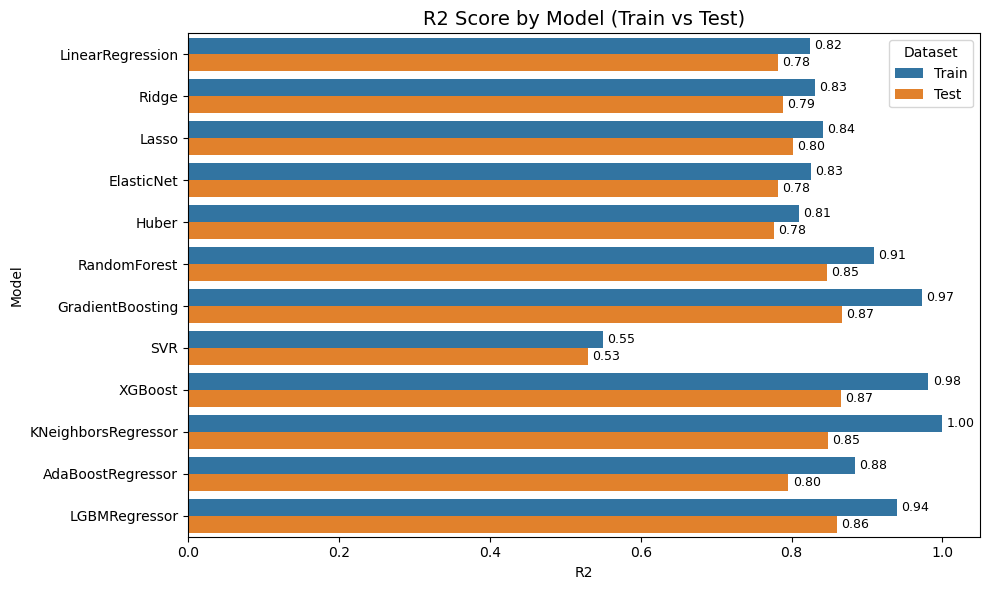

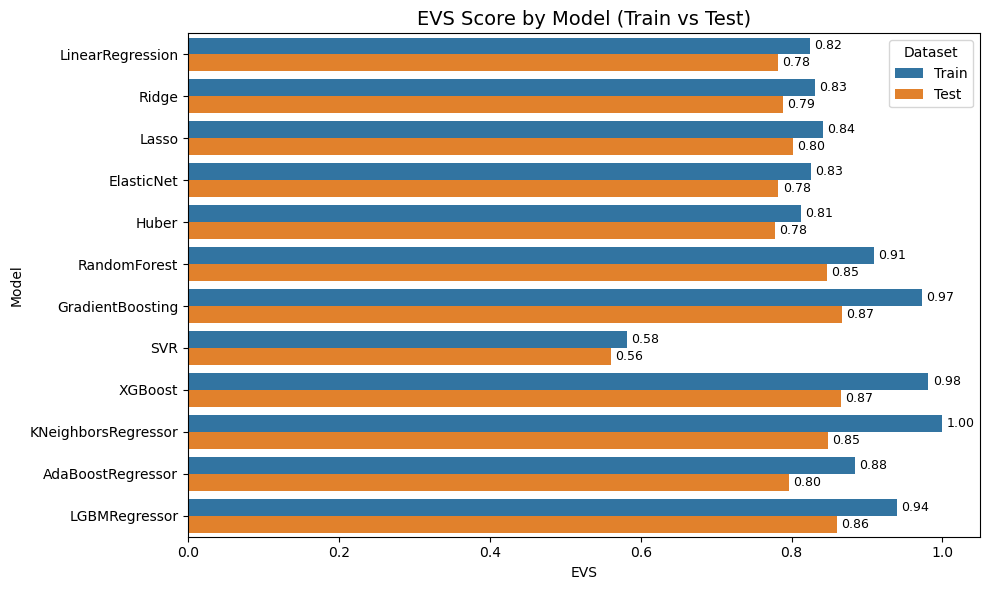

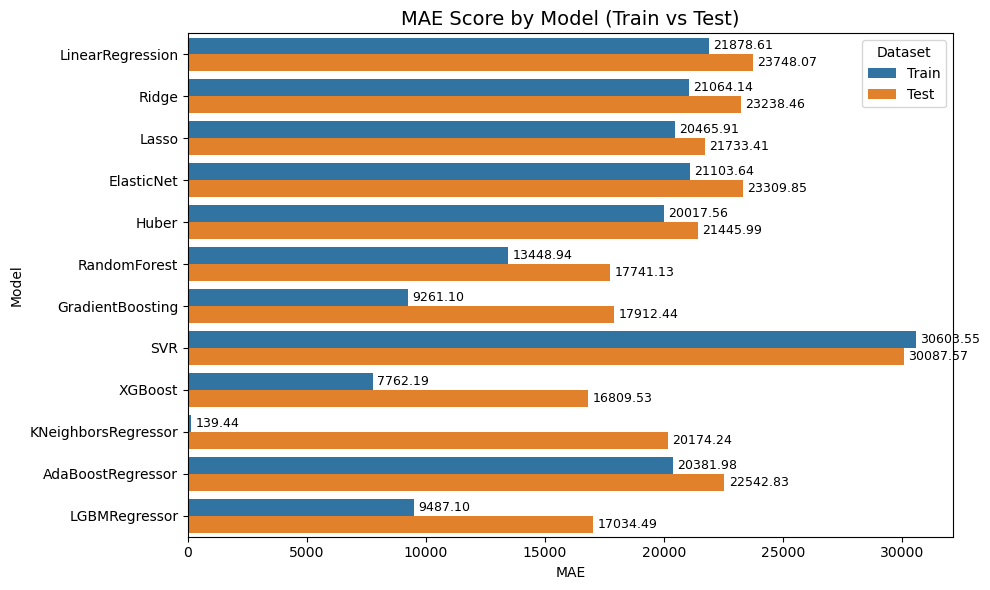

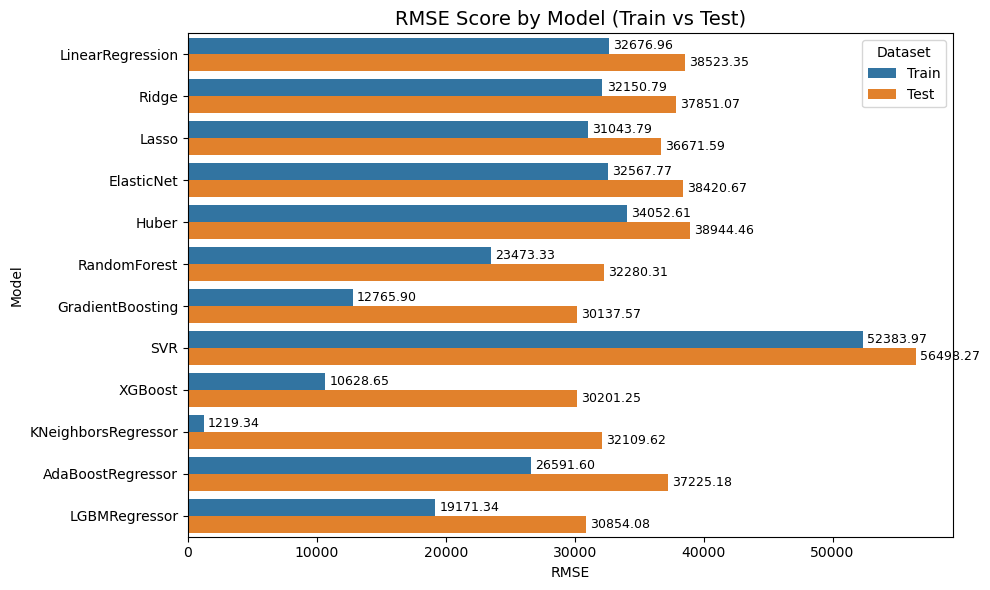

In [200]:
# Create an empty list to store rows of data
rows = []
# Define the list of metrics to extract from the results
metrics = ['train_r2', 'test_r2', 'train_evs', 'test_evs', 'train_mae', 'test_mae', 'train_rmse', 'test_rmse']
# Loop through each model and metric in the results dictionary
for model_name, result in results.items():
    for metric in metrics: # For each metric, create a dictionary with model name, metric type, dataset type, and metric value
        rows.append({
            'Model': model_name,
            'Metric': metric.replace('train_', '').replace('test_', '').upper(), # Format the metric name by removing 'train_' or 'test_' and converting to uppercase
            'Set': 'Train' if 'train' in metric else 'Test', # Determine if the metric is for the training or test set
            'Value': result[metric] # Get the metric value from the results dictionary
        })
# Convert the list of dictionaries into a pandas DataFrame
results_df = pd.DataFrame(rows)
# Get unique metrics for plotting separate graphs
unique_metrics = results_df['Metric'].unique()
# Loop over each unique metric to create its plot
for metric in unique_metrics:
    # Filter the DataFrame for the current metric
    data = results_df[results_df['Metric'] == metric]
    # Create a new figure and axes with a specified size
    plt.figure(figsize=(10, 6))
    # Plot a horizontal bar chart with separate colors for train and test sets
    ax = sns.barplot(
        data=data,
        x='Value',
        y='Model',
        hue='Set',
        palette=['#1f77b4', '#ff7f0e']
    )
    # Add data labels on the bars with formatted values
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)

    plt.title('{} Score by Model (Train vs Test)'.format(metric), fontsize=14)
    plt.xlabel(metric)
    plt.ylabel('Model')
    plt.legend(title='Dataset')
    plt.tight_layout()
    plt.show()

The graphs clearly show that most models achieve good results, but their stability leaves much to be desired. The effect of overfitting is especially noticeable in more complex models — high performance on the training set does not always translate to the test set. To improve the quality and robustness of the predictions, we will try ensemble methods, which often help reduce overfitting and increase the overall reliability of the model.

## Ensemble

Let’s build an ensemble using all models except SVR, as its performance is significantly lower than the others. This approach can help combine the strengths of individual models while minimizing their weaknesses, potentially improving both the accuracy and robustness of the final prediction.

In [218]:
models = VotingRegressor(estimators=[
    ('rf', results['RandomForest']['best_model']),
    ('gbr', results['GradientBoosting']['best_model']),
    ('xgb', results['XGBoost']['best_model']),
    ('lgbm', results['LGBMRegressor']['best_model']),
    ('knn', results['KNeighborsRegressor']['best_model']),
    ('ridge', results['Ridge']['best_model']),
    ('lasso', results['Lasso']['best_model']),
    ('elastic', results['ElasticNet']['best_model']),
    ('huber', results['Huber']['best_model']),
    ('ada', results['AdaBoostRegressor']['best_model']),
])

In [ ]:
# Fit the ensemble model on the training data
models.fit(X_train, y_train)

In [ ]:
# Generate predictions for the training and testing sets using the ensemble model
y_train_pred = models.predict(X_train)
y_test_pred = models.predict(X_test)

We collect all the main metrics (R², EVS, MAE, RMSE) on the training and test sets to compare the ensemble with the other models and assess whether the prediction quality and stability have improved.

In [221]:
voting_results = {
    'train_r2': r2_score(y_train, y_train_pred),
    'test_r2': r2_score(y_test, y_test_pred),
    'train_evs': explained_variance_score(y_train, y_train_pred),
    'test_evs': explained_variance_score(y_test, y_test_pred),
    'train_mae': mean_absolute_error(y_train, y_train_pred),
    'test_mae': mean_absolute_error(y_test, y_test_pred),
    'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred)),
    'best_model': models,
    'best_params': 'Voting of best_estimators'
}

We save the metrics of the ensemble model together with the metrics of the other models (LinearRegression, Ridge, XGBoost, etc.) in a single place — the results dictionary. This allows us to easily compare all the models with each other later.

In [222]:
results['Voting'] = voting_results

This code prints performance metrics and best parameters for each trained model to compare their performance on the training and test sets.

In [223]:
for name, metrics in results.items():
    print('Model: {}'.format(name))
    print('  Train R2: {:.4f}'.format(metrics['train_r2']))
    print('  Test R2: {:.4f}'.format(metrics['test_r2']))
    print('  Train EVS: {:.4f}'.format(metrics['train_evs']))
    print('  Test EVS: {:.4f}'.format(metrics['test_evs']))
    print('  Train RMSE: {:.4f}'.format(metrics['train_rmse']))
    print('  Test RMSE: {:.4f}'.format(metrics['test_rmse']))
    print('  Train MAE: {:.4f}'.format(metrics['train_mae']))
    print('  Test MAE: {:.4f}'.format(metrics['test_mae']))
    print('  Best Params:')
    if isinstance(metrics['best_params'], dict):
        for param, value in metrics['best_params'].items():
            print('{}: {}'.format(param, value))
    else:
        print(metrics['best_params'])
    print()
    print('-' * 30)
    print()

Model: LinearRegression
  Train R2: 0.8249
  Test R2: 0.7814
  Train EVS: 0.8249
  Test EVS: 0.7815
  Train RMSE: 32676.9648
  Test RMSE: 38523.3486
  Train MAE: 21878.6081
  Test MAE: 23748.0699
  Best Params:
regressor__positive: True
regressor__fit_intercept: True
regressor: LinearRegression()
preprocessor__ord__scaler: RobustScaler()
preprocessor__nomin__rare__tol: 0.1
preprocessor__nomin__rare__n_categories: 7
preprocessor__nomin__encode: CountFrequencyEncoder(encoding_method='frequency')
preprocessor__discr__scaler: StandardScaler()
preprocessor__discr__outlier__tail: left
preprocessor__discr__outlier__fold: 3
preprocessor__discr__outlier__capping_method: gaussian
preprocessor__discr__imputer__strategy: median
preprocessor__discr__discretizer: None
preprocessor__const__scaler: StandardScaler()
preprocessor__const__outlier__tail: left
preprocessor__const__outlier__fold: 3
preprocessor__const__outlier__capping_method: gaussian
preprocessor__const__imputer__strategy: constant
prepro

This code block generates a table of model performance metrics for easier comparison.ь

In [224]:
# Create a DataFrame from the 'results' dictionary, using the dictionary keys as row indices
df = pd.DataFrame.from_dict(results, orient='index')
# Select only the relevant metric columns from the DataFrame, excluding parameters or other info
metrics_df = df[['train_r2', 'test_r2', 'train_evs', 'test_evs', 'train_rmse', 'test_rmse', 'train_mae', 'test_mae']]
# Rename the columns to more readable and user-friendly names
metrics_df.columns = ['R2 (Train)', 'R2 (Test)', 'EVS (Train)', 'EVS (Test)', 'RMSE (Train)', 'RMSE (Test)', 'MAE (Train)', 'MAE (Test)']
# Round all numerical values in the DataFrame to 2 decimal places for better readability
metrics_df = metrics_df.round(2)
# Print a heading to indicate the content is a model comparison table
print("Model comparison:")
# Display the DataFrame in a readable table format (works in Jupyter or similar environments)
display(metrics_df)

Model comparison:


,R2 (Train),R2 (Test),EVS (Train),EVS (Test),RMSE (Train),RMSE (Test),MAE (Train),MAE (Test)
LinearRegression,0.82,0.78,0.82,0.78,32676.96,38523.35,21878.61,23748.07
Ridge,0.83,0.79,0.83,0.79,32150.79,37851.07,21064.14,23238.46
Lasso,0.84,0.80,0.84,0.80,31043.79,36671.59,20465.91,21733.41
ElasticNet,0.83,0.78,0.83,0.78,32567.77,38420.67,21103.64,23309.85
Huber,0.81,0.78,0.81,0.78,34052.61,38944.46,20017.56,21445.99
RandomForest,0.91,0.85,0.91,0.85,23473.33,32280.31,13448.94,17741.13
GradientBoosting,0.97,0.87,0.97,0.87,12765.90,30137.57,9261.10,17912.44
SVR,0.55,0.53,0.58,0.56,52383.97,56498.27,30603.55,30087.57
XGBoost,0.98,0.87,0.98,0.87,10628.65,30201.25,7762.19,16809.53
KNeighborsRegressor,1.00,0.85,1.00,0.85,1219.34,32109.62,139.44,20174.24


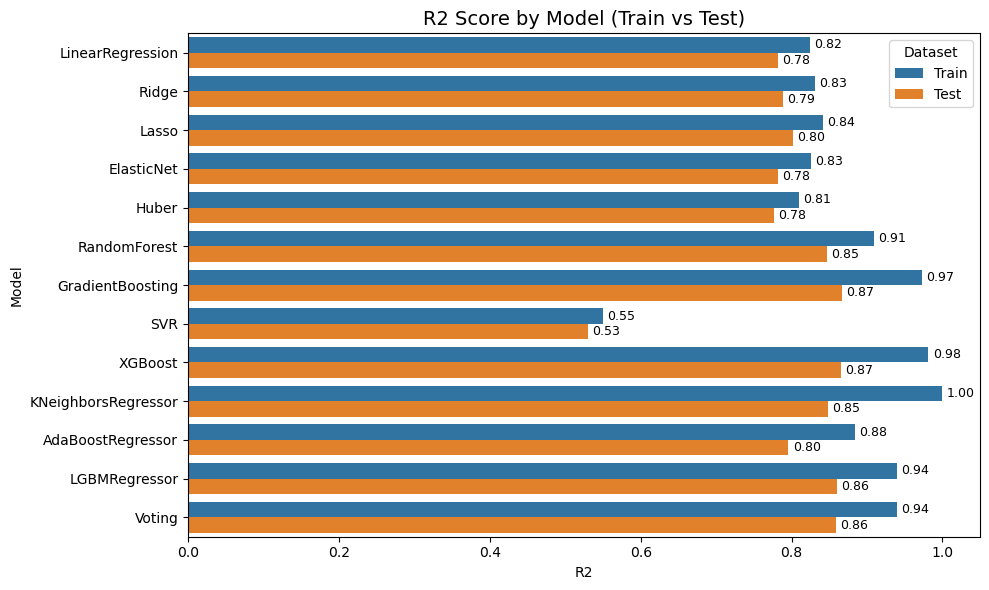

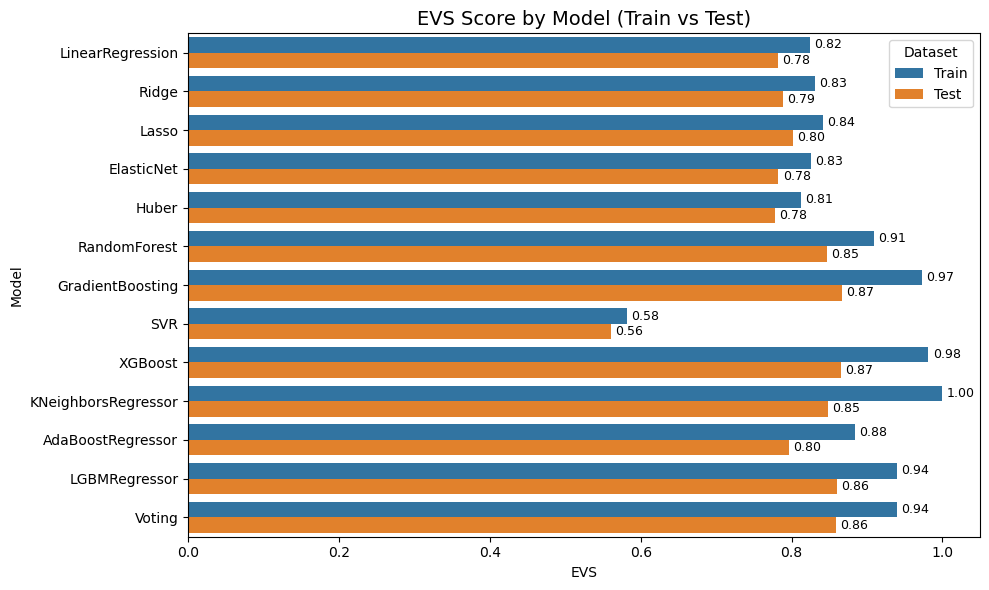

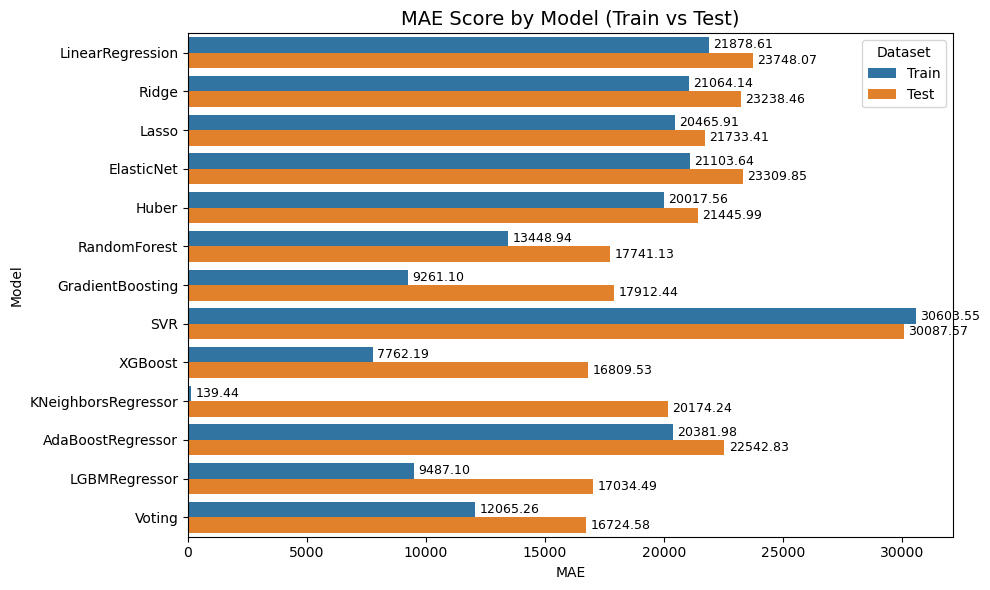

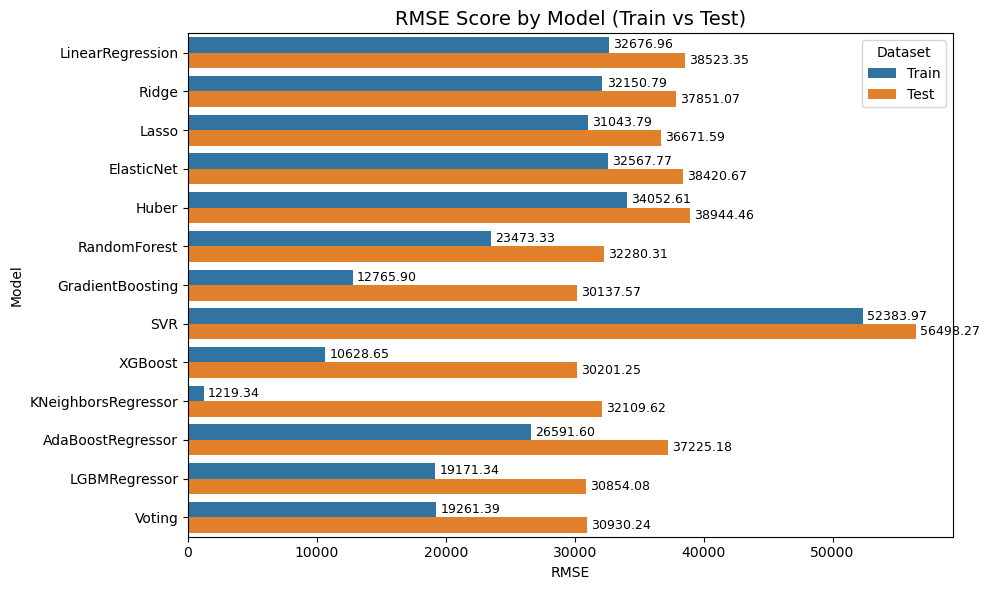

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Pipeline] ......... (step 4 of 4) Processing regressor, total=   0.9s
[Pipeline] ...... (step 1 of 4) Processing preprocessor, total=   0.2s
[Pipeline] .. (step 2 of 4) Processing post_imputer_num, total=   0.0s
[Pipeline] . (step 3 of 4) Processing feature_selection, total=   0.5s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 920, number o

In [225]:
# Initialize an empty list to store rows for the new DataFrame
rows = []
# Define the list of metric keys to extract from the results dictionary
metric_names = ['train_r2', 'test_r2', 'train_evs', 'test_evs', 'train_mae', 'test_mae', 'train_rmse', 'test_rmse']

for model_name, result in results.items(): # Loop through each model name and its corresponding results dictionary
    for metric in metric_names:  # Loop through each metric in the predefined metric list
        rows.append({
            # Add the model name to the 'Model' column
            'Model': model_name,
            # Remove 'train_' or 'test_' prefix from metric and convert to uppercase for readability
            'Metric': metric.replace('train_', '').replace('test_', '').upper(),
            # Label the dataset as 'Train' or 'Test' based on the metric prefix
            'Set': 'Train' if 'train' in metric else 'Test',
            # Add the metric value from the results dictionary
            'Value': result[metric]
        })
# Convert the list of dictionaries into a DataFrame for easier plotting and analysis
results_data = pd.DataFrame(rows)
# Get the unique metric names from the 'Metric' column for plotting separate charts for each metric
unique_metrics = results_df['Metric'].unique()

# Iterate over each unique metric
for metric in unique_metrics:
    # Filter the DataFrame for the current metric
    data = results_data[results_data['Metric'] == metric]
    # Create a new figure with specified size for each plot
    plt.figure(figsize=(10, 6))
    # Plot a horizontal barplot with 'Value' on x-axis, 'Model' on y-axis, and bars colored by dataset ('Train' or 'Test')
    ax = sns.barplot(
        data=data,
        x='Value',
        y='Model',
        hue='Set',
        palette=['#1f77b4', '#ff7f0e']
    )
    # Plot a horizontal barplot with 'Value' on x-axis, 'Model' on y-axis, and bars colored by dataset ('Train' or 'Test')
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)

    plt.title('{} Score by Model (Train vs Test)'.format(metric), fontsize=14)
    plt.xlabel(metric)
    plt.ylabel('Model')
    plt.legend(title='Dataset')
    plt.tight_layout()
    plt.show()

## Conclusions

After all the experiments, it became clear that different machine learning models perform differently when it comes to predicting house prices.
It seems that the more complex models — such as GradientBoosting and XGBoost — performed the best. They likely managed to capture more useful patterns in the data and overall showed the highest R² scores, along with low error values (RMSE and MAE) on the test set. That’s probably why they turned out to be the most accurate models in this project.
However, it’s important to keep in mind that such models are prone to overfitting. For example, some of them showed almost perfect results on the training data but performed noticeably worse on the test set. This suggests a certain level of instability and a tendency to overfit. So even when the results look good, it’s important to be cautious — the model might have just memorized the training data too well.
Models like RandomForest and LGBMRegressor also performed quite well. Their results were a bit more modest compared to the top models, but they were more stable. Their predictions looked reasonably accurate and consistent, especially on the test data.
As for linear models (LinearRegression, Ridge, Lasso, ElasticNet), they showed stable but overall weaker accuracy. Among them, Lasso seemed to do slightly better than the others. This might be due to its ability to select only the most important features and ignore the rest.
AdaBoostRegressor had results similar to the linear models. It may be that this model doesn’t handle this type of data particularly well.
SVR, on the other hand, lagged far behind the other models. Its accuracy was significantly lower, especially on the test set. It’s possible that this model just isn’t well-suited for this task, or maybe it needs very different tuning.
An interesting case was the KNeighborsRegressor. It showed almost perfect results on the training data but performed poorly on the test set. This is most likely a sign of overfitting: the model “memorized” the training examples but struggles with new, unseen houses.
Finally, it’s worth mentioning the Voting Ensemble, which combined the best-performing models. Its results were very stable and close to those of GradientBoosting and XGBoost. It seems that combining several strong models really can help make predictions more reliable and accurate.
Overall, it looks like the best choice for predicting house prices would be GradientBoosting, XGBoost, or a combination of the two in an ensemble. Simpler models can still be useful as a baseline or in situations where speed is more important than precision — but in terms of accuracy, they tend to fall behind. And some models, like SVR, probably aren’t the best fit for this kind of task.